<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/pca_intro_3D_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Projection of 3D Data

This script generates three clusters of synthetic 3‑dimensional points, computes the first two principal components using scikit‑learn’s PCA, and then creates a two‑panel figure:

1. **Left panel**: A 3D scatter of the original points, the best‐fit plane defined by the first two principal components, and projection lines from each point down onto that plane.  
2. **Right panel**: A 2D scatter of the projected coordinates (the principal component scores) along the first two components, colored by cluster.

Use this visualization to understand how PCA finds the plane that maximizes variance and how the data look when reduced to two dimensions.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

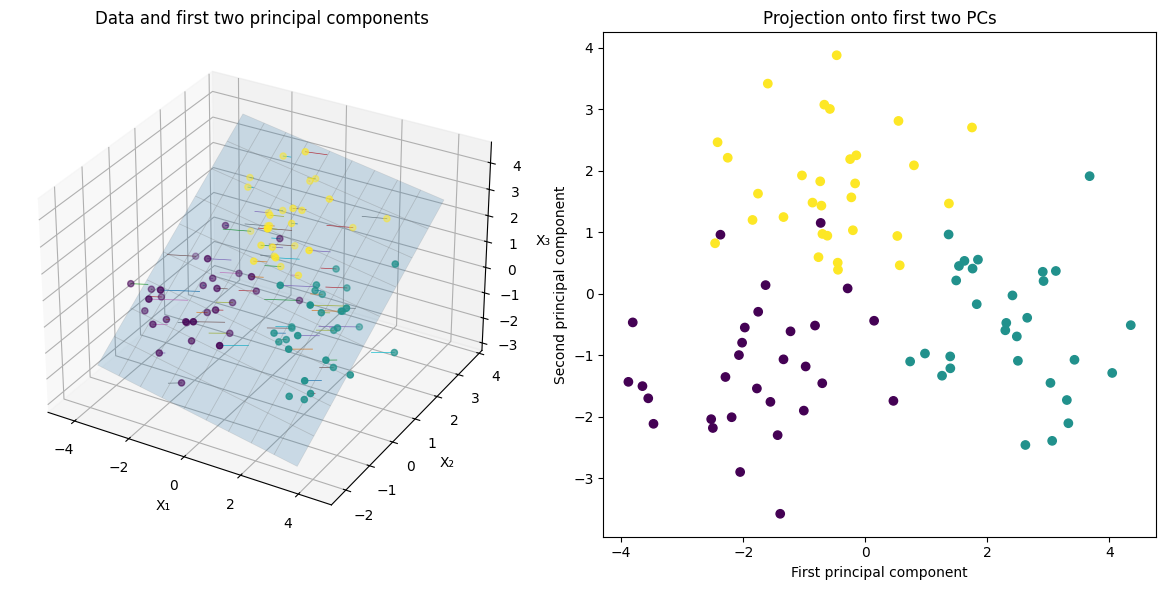

In [4]:
# 1. Generate synthetic 3D data (three clusters)
np.random.seed(0)
n = 30
means = [(-2, 0, 0), (2, 0, 0), (0, 2, 2)]
data = np.vstack([np.random.randn(n, 3) + m for m in means])
labels = np.array([0]*n + [1]*n + [2]*n)

# 2. Perform PCA to get first two components
pca = PCA(n_components=2)
scores = pca.fit_transform(data)
components = pca.components_
mean_3d = pca.mean_

# 3. Create a meshgrid for the principal component plane
grid_x, grid_y = np.meshgrid(
    np.linspace(-4, 4, 10),
    np.linspace(-4, 4, 10)
)
# Plane points: mean + x*pc1 + y*pc2
plane_points = mean_3d + grid_x[..., None] * components[0] + grid_y[..., None] * components[1]

# 4. Inverse transform scores to get projections back into 3D
proj_3d = pca.inverse_transform(scores)

# 5. Plotting
fig = plt.figure(figsize=(12, 6))

# Left: 3D scatter with PCA plane and projection lines
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)
ax1.plot_surface(
    plane_points[:, :, 0],
    plane_points[:, :, 1],
    plane_points[:, :, 2],
    alpha=0.2,
    edgecolor='gray',
    linewidth=0.5
)
for i in range(data.shape[0]):
    xs = [data[i, 0], proj_3d[i, 0]]
    ys = [data[i, 1], proj_3d[i, 1]]
    zs = [data[i, 2], proj_3d[i, 2]]
    ax1.plot(xs, ys, zs, linewidth=0.5)
ax1.set_title('Data and first two principal components')
ax1.set_xlabel('X₁')
ax1.set_ylabel('X₂')
ax1.set_zlabel('X₃')

# Right: 2D scatter of PCA scores
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(scores[:, 0], scores[:, 1], c=labels)
ax2.set_title('Projection onto first two PCs')
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')

plt.tight_layout()
plt.show()


## Reworked figure

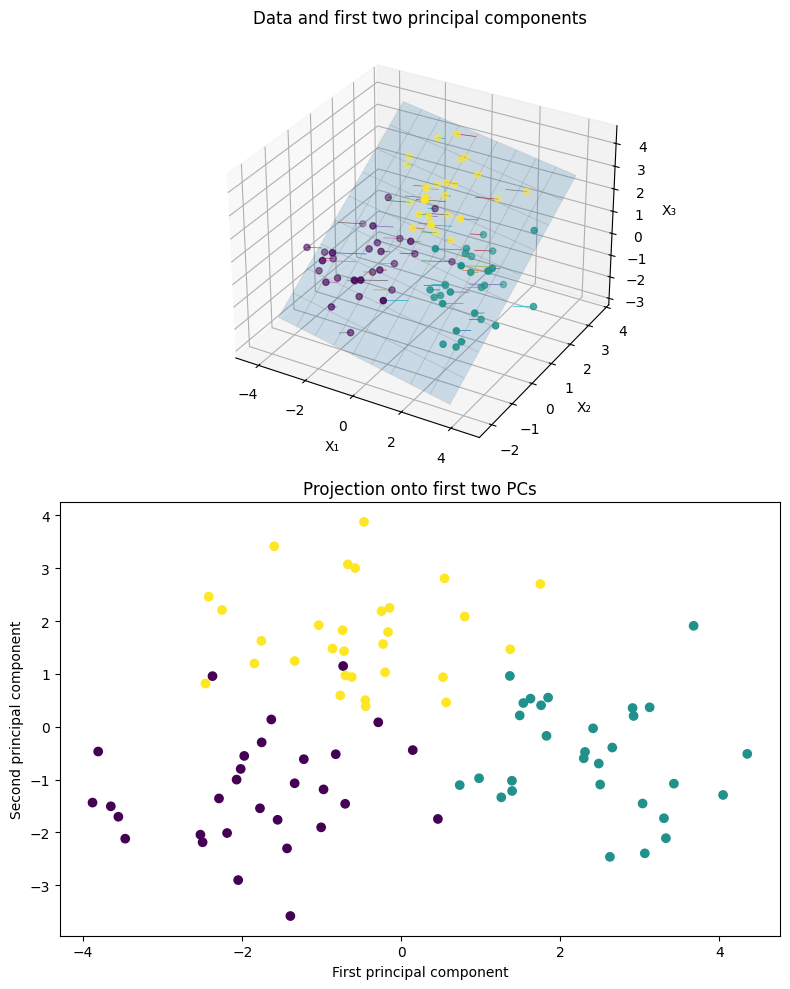

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Generate synthetic 3D data (three clusters)
np.random.seed(0)
n = 30
means = [(-2, 0, 0), (2, 0, 0), (0, 2, 2)]
data = np.vstack([np.random.randn(n, 3) + m for m in means])
labels = np.array([0]*n + [1]*n + [2]*n)

# 2. Perform PCA to get first two components
pca = PCA(n_components=2)
scores = pca.fit_transform(data)
components = pca.components_
mean_3d = pca.mean_

# 3. Create a meshgrid for the principal component plane
grid_x, grid_y = np.meshgrid(
    np.linspace(-4, 4, 10),
    np.linspace(-4, 4, 10)
)
# Plane points: mean + x*pc1 + y*pc2
plane_points = mean_3d + grid_x[..., None] * components[0] + grid_y[..., None] * components[1]

# 4. Inverse transform scores to get projections back into 3D
proj_3d = pca.inverse_transform(scores)

# 5. Plotting with vertical layout (2 rows, 1 column)
fig = plt.figure(figsize=(8, 10))

# Top: 3D scatter with PCA plane and projection lines
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)
ax1.plot_surface(
    plane_points[:, :, 0],
    plane_points[:, :, 1],
    plane_points[:, :, 2],
    alpha=0.2,
    edgecolor='gray',
    linewidth=0.5
)
for i in range(data.shape[0]):
    xs = [data[i, 0], proj_3d[i, 0]]
    ys = [data[i, 1], proj_3d[i, 1]]
    zs = [data[i, 2], proj_3d[i, 2]]
    ax1.plot(xs, ys, zs, linewidth=0.5)
ax1.set_title('Data and first two principal components')
ax1.set_xlabel('X₁')
ax1.set_ylabel('X₂')
ax1.set_zlabel('X₃')

# Bottom: 2D scatter of PCA scores
ax2 = fig.add_subplot(2, 1, 2)
ax2.scatter(scores[:, 0], scores[:, 1], c=labels)
ax2.set_title('Projection onto first two PCs')
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')

plt.tight_layout()
plt.show()